# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('M:\Website_Port\ebac-datascience\SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [3]:
sinasc_1 =  sinasc_raw.copy()

In [4]:
sinasc_1["latitude"] =  pd.cut(sinasc_1["munResLat"],[-float("inf"),-10.5,float("inf")])

In [5]:
sinasc_1.groupby("latitude")[["QTDPARTCES","QTDPARTNOR"]].agg([("soma","sum"),("min","min"),("máx","max"),("média",np.mean),("mediana",np.median),("desvio padrão",np.std),("variância",np.var)])


QTDPARTCES                                                       \
                    soma  min   máx     média mediana desvio padrão variância   
latitude                                                                        
(-inf, -10.5]     7095.0  0.0  12.0  0.552570     0.0      0.753036  0.567062   
(-10.5, inf]      6041.0  0.0  12.0  0.487335     0.0      0.737899  0.544495   

              QTDPARTNOR                                                       
                    soma  min   máx     média mediana desvio padrão variância  
latitude                                                                       
(-inf, -10.5]     5800.0  0.0  41.0  0.452242     0.0      1.123426  1.262087  
(-10.5, inf]      8771.0  0.0  40.0  0.711759     0.0      1.279042  1.635949

sinasc_lat.unique()

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [6]:
sinasc_1["municipio"] = pd.cut(sinasc_1["munResArea"],[-float("inf"),3000,float("inf")])
sinasc_1.groupby("municipio")[["SEMAGESTAC","CONSPRENAT"]].agg([("soma","sum"),("min","min"),("máx","max"),("média",np.mean),("mediana",np.median),("desvio padrão",np.std),("variância",np.var)])


SEMAGESTAC                                               \
                     soma   min   máx      média mediana desvio padrão   
municipio                                                                
(-inf, 3000.0]   197469.0  21.0  45.0  38.470485    39.0      1.874927   
(3000.0, inf]    797147.0  19.0  45.0  38.591547    39.0      2.049838   

                         CONSPRENAT                               \
               variância       soma  min   máx     média mediana   
municipio                                                          
(-inf, 3000.0]  3.515350    44775.0  0.0  99.0  8.709395     8.0   
(3000.0, inf]   4.201834   170662.0  0.0  99.0  8.143825     8.0   

                                         
               desvio padrão  variância  
municipio                                
(-inf, 3000.0]      4.290017  18.404248  
(3000.0, inf]       5.325530  28.361275

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [7]:
sinasc_1["altura"] = pd.qcut(sinasc_1["munResAlt"],4)
sinasc_1.groupby("altura")[["QTDPARTCES","QTDPARTNOR"]].agg([("soma","sum"),("min","min"),("máx","max"),("média",np.mean),("mediana",np.median),("desvio padrão",np.std),("variância",np.var)])


QTDPARTCES                                             \
                     soma  min   máx     média mediana desvio padrão   
altura                                                                 
(84.999, 87.0]     3364.0  0.0  12.0  0.448773     0.0      0.735847   
(87.0, 153.0]      2333.0  0.0   4.0  0.519368     0.0      0.736689   
(153.0, 191.0]     3563.0  0.0  12.0  0.517727     0.0      0.750559   
(191.0, 595.0]     3876.0  0.0   5.0  0.608860     0.0      0.751648   

                         QTDPARTNOR                               \
               variância       soma  min   máx     média mediana   
altura                                                             
(84.999, 87.0]  0.541471     6024.0  0.0  40.0  0.801917     0.0   
(87.0, 153.0]   0.542711     3283.0  0.0  14.0  0.744107     0.0   
(153.0, 191.0]  0.563339     2915.0  0.0   9.0  0.423877     0.0   
(191.0, 595.0]  0.564974     2349.0  0.0  41.0  0.370096     0.0   

                                        
               desvio padrão variância  
altura                                  
(84.999, 87.0]      1.380931  1.906970  
(87.0, 153.0]       1.330296  1.769689  
(153.0, 191.0]      0.917432  0.841681  
(191.0, 595.0]      1.116704  1.247029

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [8]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",  
    "Ariquemes": "Ariquemes",
    "Alto Paraíso":  "Ariquemes",
    "Buritis":  "Ariquemes",
    "Cacaulândia":  "Ariquemes",
    "Campo Novo de Rondônia":  "Ariquemes",
    "Cujubim":  "Ariquemes",
    "Monte Negro":  "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal":  "Cacoal",
    "Alta Floresta D'Oeste":  "Cacoal",
    "Alto Alegre dos Parecis":  "Cacoal",
    "Castanheiras":  "Cacoal",
    "Espigão D'Oeste":  "Cacoal",
    "Ministro Andreazza":  "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena":"Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste":"Vilhena"
}

Text(0, 0.5, 'média idade mãe')

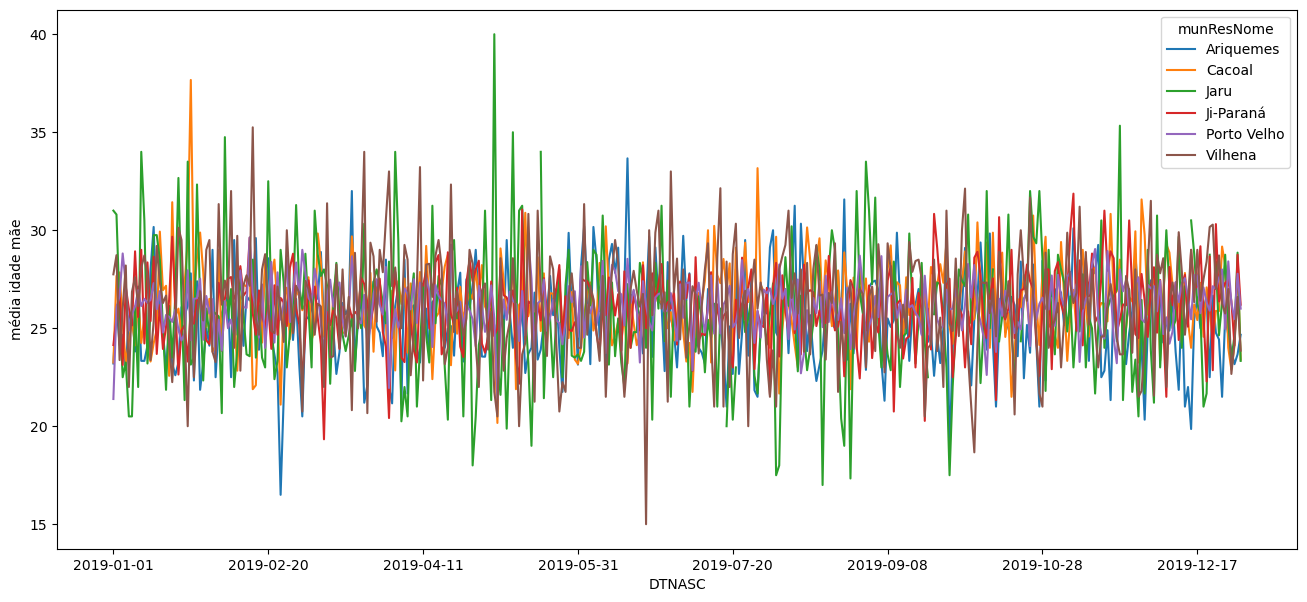

In [9]:
sinasc_2 = sinasc_raw.set_index('munResNome')
sinasc_2.groupby(['DTNASC', imediatas])['IDADEMAE'].mean().unstack().plot(figsize=[16,7])
plt.ylabel('média idade mãe')

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [12]:
dados_ro = pd.read_csv("M:\Website_Port\ebac-datascience\dados\dados_extras_ro (1).csv",sep = ";", encoding="latin_1")                  

In [17]:
idh = dict(zip(dados_ro['municipio'], dados_ro['idh']))

In [18]:
idh

{"Alta Floresta D'Oeste": 0.641,
 'Alto Alegre dos Parecis': 0.592,
 'Alto Paraíso': 0.625,
 "Alvorada D'Oeste": 0.643,
 'Ariquemes': 0.702,
 'Buritis': 0.616,
 'Cabixi': 0.65,
 'Cacaulândia': 0.646,
 'Cacoal': 0.718,
 'Campo Novo de Rondônia': 0.593,
 'Candeias do Jamari': 0.649,
 'Castanheiras': 0.658,
 'Cerejeiras': 0.692,
 'Chupinguaia': 0.652,
 'Colorado do Oeste': 0.685,
 'Corumbiara': 0.613,
 'Costa Marques': 0.611,
 'Cujubim': 0.612,
 "Espigão D'Oeste": 0.672,
 'Governador Jorge Teixeira': 0.596,
 'Guajará-Mirim': 0.657,
 'Itapuã do Oeste': 0.614,
 'Jaru': 0.689,
 'Ji-Paraná': 0.714,
 "Machadinho D'Oeste": 0.596,
 'Ministro Andreazza': 0.638,
 'Mirante da Serra': 0.643,
 'Monte Negro': 0.607,
 "Nova Brasilândia D'Oeste": 0.643,
 'Nova Mamoré': 0.587,
 'Nova União': 0.587,
 'Novo Horizonte do Oeste': 0.634,
 'Ouro Preto do Oeste': 0.682,
 'Parecis': 0.617,
 'Pimenta Bueno': 0.71,
 'Pimenteiras do Oeste': 0.665,
 'Porto Velho': 0.736,
 'Presidente Médici': 0.664,
 'Primavera de R

In [19]:
for chave, valor in idh.items():
    if valor >= 0.7:
        idh[chave] = "IDH-M Alto"
    elif valor >= 0.6 and valor <0.7:
        idh[chave] = "IDH-M Médio"
    else:
        idh[chave] = "IDH-M Baixo"

In [20]:
idh

{"Alta Floresta D'Oeste": 'IDH-M Médio',
 'Alto Alegre dos Parecis': 'IDH-M Baixo',
 'Alto Paraíso': 'IDH-M Médio',
 "Alvorada D'Oeste": 'IDH-M Médio',
 'Ariquemes': 'IDH-M Alto',
 'Buritis': 'IDH-M Médio',
 'Cabixi': 'IDH-M Médio',
 'Cacaulândia': 'IDH-M Médio',
 'Cacoal': 'IDH-M Alto',
 'Campo Novo de Rondônia': 'IDH-M Baixo',
 'Candeias do Jamari': 'IDH-M Médio',
 'Castanheiras': 'IDH-M Médio',
 'Cerejeiras': 'IDH-M Médio',
 'Chupinguaia': 'IDH-M Médio',
 'Colorado do Oeste': 'IDH-M Médio',
 'Corumbiara': 'IDH-M Médio',
 'Costa Marques': 'IDH-M Médio',
 'Cujubim': 'IDH-M Médio',
 "Espigão D'Oeste": 'IDH-M Médio',
 'Governador Jorge Teixeira': 'IDH-M Baixo',
 'Guajará-Mirim': 'IDH-M Médio',
 'Itapuã do Oeste': 'IDH-M Médio',
 'Jaru': 'IDH-M Médio',
 'Ji-Paraná': 'IDH-M Alto',
 "Machadinho D'Oeste": 'IDH-M Baixo',
 'Ministro Andreazza': 'IDH-M Médio',
 'Mirante da Serra': 'IDH-M Médio',
 'Monte Negro': 'IDH-M Médio',
 "Nova Brasilândia D'Oeste": 'IDH-M Médio',
 'Nova Mamoré': 'IDH-M B

In [21]:
sinasc_3 = sinasc_raw.copy()

In [22]:
sinasc_3 = sinasc_3.set_index('munResNome')

In [23]:
sinasc_3= sinasc_3[["QTDPARTCES","QTDPARTNOR"]]

In [24]:
sinasc_3.groupby(idh)["QTDPARTCES","QTDPARTNOR"].agg([("média", np.mean),("máx","max"),("min","min")])

C:\Users\Mimi Renno\AppData\Local\Temp\ipykernel_11148\2783413751.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_3.groupby(idh)["QTDPARTCES","QTDPARTNOR"].agg([("média", np.mean),("máx","max"),("min","min")])


QTDPARTCES            QTDPARTNOR           
                 média   máx  min      média   máx  min
munResNome                                             
IDH-M Alto    0.499454  12.0  0.0   0.578495  40.0  0.0
IDH-M Baixo   0.488979   3.0  0.0   0.662162  41.0  0.0
IDH-M Médio   0.568660   5.0  0.0   0.563303  40.0  0.0

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [25]:
ifdm = dict(zip(dados_ro['municipio'], dados_ro['ifdm']))

In [26]:
ifdm

{"Alta Floresta D'Oeste": 0.6337,
 'Alto Alegre dos Parecis': 0.5046,
 'Alto Paraíso': 0.5735,
 "Alvorada D'Oeste": 0.5919,
 'Ariquemes': 0.7746,
 'Buritis': 0.6199,
 'Cabixi': 0.5887,
 'Cacaulândia': 0.5721,
 'Cacoal': 0.7111,
 'Campo Novo de Rondônia': 0.5272,
 'Candeias do Jamari': 0.6199,
 'Castanheiras': 0.543,
 'Cerejeiras': 0.6137,
 'Chupinguaia': 0.6766,
 'Colorado do Oeste': 0.6473,
 'Corumbiara': 0.5759,
 'Costa Marques': 0.5626,
 'Cujubim': 0.5055,
 "Espigão D'Oeste": 0.5973,
 'Governador Jorge Teixeira': 0.4562,
 'Guajará-Mirim': 0.5541,
 'Itapuã do Oeste': 0.5903,
 'Jaru': 0.645,
 'Ji-Paraná': 0.7117,
 "Machadinho D'Oeste": 0.5322,
 'Ministro Andreazza': 0.5657,
 'Mirante da Serra': 0.5519,
 'Monte Negro': 0.6016,
 "Nova Brasilândia D'Oeste": 0.5857,
 'Nova Mamoré': 0.5084,
 'Nova União': 0.5571,
 'Novo Horizonte do Oeste': 0.5858,
 'Ouro Preto do Oeste': 0.6261,
 'Parecis': 0.5502,
 'Pimenta Bueno': 0.7383,
 'Pimenteiras do Oeste': 0.6501,
 'Porto Velho': 0.7257,
 'Presid

In [27]:
for chave, valor in ifdm.items():
    if valor >= 0.6:
        ifdm[chave] = "Desenvolvimento moderado"
    elif valor >= 0.4:
        ifdm[chave] = "Desenvolvimento regular"
    else:
        ifdm[chave] = "Desenvolvimento baixo"


In [28]:
ifdm

{"Alta Floresta D'Oeste": 'Desenvolvimento moderado',
 'Alto Alegre dos Parecis': 'Desenvolvimento regular',
 'Alto Paraíso': 'Desenvolvimento regular',
 "Alvorada D'Oeste": 'Desenvolvimento regular',
 'Ariquemes': 'Desenvolvimento moderado',
 'Buritis': 'Desenvolvimento moderado',
 'Cabixi': 'Desenvolvimento regular',
 'Cacaulândia': 'Desenvolvimento regular',
 'Cacoal': 'Desenvolvimento moderado',
 'Campo Novo de Rondônia': 'Desenvolvimento regular',
 'Candeias do Jamari': 'Desenvolvimento moderado',
 'Castanheiras': 'Desenvolvimento regular',
 'Cerejeiras': 'Desenvolvimento moderado',
 'Chupinguaia': 'Desenvolvimento moderado',
 'Colorado do Oeste': 'Desenvolvimento moderado',
 'Corumbiara': 'Desenvolvimento regular',
 'Costa Marques': 'Desenvolvimento regular',
 'Cujubim': 'Desenvolvimento regular',
 "Espigão D'Oeste": 'Desenvolvimento regular',
 'Governador Jorge Teixeira': 'Desenvolvimento regular',
 'Guajará-Mirim': 'Desenvolvimento regular',
 'Itapuã do Oeste': 'Desenvolvimento

In [29]:
sinasc_4 = sinasc_raw.copy()

In [30]:
sinasc_4 = sinasc_4.set_index('munResNome')


In [31]:
sinasc_4= sinasc_4[["QTDPARTCES","QTDPARTNOR"]]
sinasc_4.groupby(ifdm)["QTDPARTCES","QTDPARTNOR"].agg([("média", np.mean),("máx","max"),("min","min")])

C:\Users\Mimi Renno\AppData\Local\Temp\ipykernel_11148\928641391.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_4.groupby(ifdm)["QTDPARTCES","QTDPARTNOR"].agg([("média", np.mean),("máx","max"),("min","min")])


QTDPARTCES            QTDPARTNOR           
                              média   máx  min      média   máx  min
munResNome                                                          
Desenvolvimento moderado   0.517966  12.0  0.0   0.553020  40.0  0.0
Desenvolvimento regular    0.531098   4.0  0.0   0.688431  41.0  0.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [32]:
pib = dict(zip(dados_ro['municipio'], dados_ro['pib']))

In [33]:
pib

{"Alta Floresta D'Oeste": 496000,
 'Alto Alegre dos Parecis': 213410,
 'Alto Paraíso': 358000,
 "Alvorada D'Oeste": 204098,
 'Ariquemes': 2579830,
 'Buritis': 726000,
 'Cabixi': 113031,
 'Cacaulândia': 116635,
 'Cacoal': 2261644,
 'Campo Novo de Rondônia': 208821,
 'Candeias do Jamari': 548000,
 'Castanheiras': 59779,
 'Cerejeiras': 507000,
 'Chupinguaia': 190331,
 'Colorado do Oeste': 335000,
 'Corumbiara': 188218,
 'Costa Marques': 171878,
 'Cujubim': 385000,
 "Espigão D'Oeste": 625000,
 'Governador Jorge Teixeira': 148027,
 'Guajará-Mirim': 893000,
 'Itapuã do Oeste': 129351,
 'Jaru': 1500890,
 'Ji-Paraná': 3783972,
 "Machadinho D'Oeste": 633000,
 'Ministro Andreazza': 174633,
 'Mirante da Serra': 163955,
 'Monte Negro': 219152,
 "Nova Brasilândia D'Oeste": 360000,
 'Nova Mamoré': 529000,
 'Nova União': 92346,
 'Novo Horizonte do Oeste': 129399,
 'Ouro Preto do Oeste': 834000,
 'Parecis': 80759,
 'Pimenta Bueno': 1164877,
 'Pimenteiras do Oeste': 76756,
 'Porto Velho': 17912070,
 'P

In [34]:
for chave, valor in pib.items():
    if  valor > 1000000:
        pib[chave] = "Mais de 1 bilhão"
    elif valor > 500000:
        pib[chave] = "Acima de 500 Milhões"
    elif valor > 300000:
        pib[chave] = "Acima de 300 Milhões"
    elif valor > 200000:
        pib[chave] = "Acima de 200 Milhões"
    elif valor > 100000:
        pib[chave] = "Acima de 100 Milhões"
    else:
        pib[chave] = "Até 100 Milhões"
sinasc_5 = sinasc_raw.copy()
sinasc_5 = sinasc_5.set_index('munResNome')
sinasc_5= sinasc_5[["QTDPARTCES","QTDPARTNOR"]]
sinasc_5.groupby(pib)["QTDPARTCES","QTDPARTNOR"].agg([("média", np.mean),("máx","max"),("min","min")])

C:\Users\Mimi Renno\AppData\Local\Temp\ipykernel_11148\114133177.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_5.groupby(pib)["QTDPARTCES","QTDPARTNOR"].agg([("média", np.mean),("máx","max"),("min","min")])


QTDPARTCES            QTDPARTNOR           
                          média   máx  min      média   máx  min
munResNome                                                      
Acima de 100 Milhões   0.530058   4.0  0.0   0.475967  14.0  0.0
Acima de 200 Milhões   0.566517   3.0  0.0   0.540373  41.0  0.0
Acima de 300 Milhões   0.553043   4.0  0.0   0.465304   8.0  0.0
Acima de 500 Milhões   0.572119   5.0  0.0   0.751821  40.0  0.0
Até 100 Milhões        0.582160   3.0  0.0   0.442623   6.0  0.0
Mais de 1 bilhão       0.499939  12.0  0.0   0.569137  40.0  0.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

A média de partos normais é mais elevada nos municípios com IDH mais baixo em comparação com aqueles de IDH médio e alto, enquanto a média mais elevada de de partos cesarianos ocorre nos municípios de IDH médio. 